## are the coexpression block boundries the same as TADs?

In [1]:
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
import os

ModuleNotFoundError: No module named 'pyranges'

In [4]:
# download the tad boundries
# data from http://dna.cs.miami.edu/TADKB/search.php
tad_path = '/home/klawren/oak/coexp_eqtl/data/TAD_annotations/TADs_hg38/converted_HiC_GM12878_DI_10kb.txt'
#tad_path = '/home/klawren/oak/coexp_eqtl/data/TAD_annotations/TADs/HiC_CH12-LX_DI_10kb.txt'

tad_df = pd.read_csv(tad_path, header=None, sep='\t', names=['Chromosome', 'start','end'])
tad_df.head()

,Chromosome,start,end
0,chr1,804620,1294620
1,chr1,1324620,1748561
2,chr1,1778561,1918561
3,chr1,1918561,2388561
4,chr1,2388561,2678561


In [3]:
# we need to make one file with all the clusters

for tissue in os.listdir('/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/'):
    print(tissue)
    chr_list=[]
    for i in range(22):
        corr_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/output/1_correlations/{}/clusters_chr_{}.csv'.format(tissue, i+1)
        chr_list.append(pd.read_csv(corr_path))
    out_dir = '/home/klawren/oak/coexp_eqtl/output/{}/'.format(tissue)
    try:
        os.mkdir(out_dir)
    except FileExistsError:
        print('done')
    out_path = '/home/klawren/oak/coexp_eqtl/output/{}/clusters_all_chr.csv'.format(tissue)
    pd.concat(chr_list).to_csv(out_path)


Skin_Not_Sun_Exposed_Suprapubic
done
Muscle_Skeletal
done
Adipose_Visceral_Omentum
done
Skin_Sun_Exposed_Lower_leg
done
Whole_Blood
done
Esophagus_Muscularis
done
Thyroid
done
Lung
done
Nerve_Tibial
done
Cells_Cultured_fibroblasts
done
Esophagus_Mucosa
done
Artery_Tibial
done
Adipose_Subcutaneous
done


In [117]:
# download the coexp clusters
clusters_path = '/home/klawren/oak/coexp_eqtl/output/Whole_Blood/clusters_all_chr.csv'
clusters_path = '/home/klawren/oak/coexp_eqtl/output/Skin_Sun_Exposed_Lower_leg/clusters_all_chr.csv'


# data from all chromosomes combined
clusters = pd.read_csv(clusters_path, index_col=0)
clusters['Chromosome']  = 'chr' + clusters['Chromosome'].astype(str)
clusters.head()

,N_genes,Transcripts,Genes,Perc_cor,Mean_cor,Mean_pos_cor,Mean_neg_cor,Chromosome,Tissue
0,18,"ENSG00000176075.7,ENSG00000187223.3,ENSG000001...","LCE2B, IVL, LCE1D, LINC00302, LCE1E, LCE1A, LC...",71.895,0.565,0.565,NaN,chr1,Skin_Sun_Exposed_Lower_leg
1,17,"ENSG00000185962.1,ENSG00000176075.7,ENSG000001...","LCE2B, LCE1D, LINC00302, LCE3A, LCE1E, LCE1A, ...",75.735,0.583,0.583,NaN,chr1,Skin_Sun_Exposed_Lower_leg
2,8,"ENSG00000169469.8,ENSG00000163216.6,ENSG000002...","SPRR2G, SPRR2D, SPRR1B, SPRR2B, SPRR2E, SPRR2C...",82.143,0.447,0.447,NaN,chr1,Skin_Sun_Exposed_Lower_leg
3,5,"ENSG00000237973.1,ENSG00000229344.1,ENSG000002...","MTCO3P12, MTCO2P12, MTCO1P12, MTATP8P1, MTATP6P1",70.000,0.454,0.454,NaN,chr1,Skin_Sun_Exposed_Lower_leg
4,5,"ENSG00000117226.11,ENSG00000117228.9,ENSG00000...","GBP3, GBP1, GBP2, GBP4, PTGES3P1",70.000,0.276,0.276,NaN,chr1,Skin_Sun_Exposed_Lower_leg


In [118]:
# annotate clusters with the start and end of the first and last gene
# download the gene list 
gtf_path = '/oak/stanford/groups/smontgom/tami/eqtl_project/data/gencode.v26.GRCh38.genes.gtf'

full_g = pr.read_gtf(gtf_path)
transcript_df = full_g[full_g.Feature == 'transcript'].df
transcript_df.set_index('transcript_id', inplace=True)
transcript_df.head()

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,gene_name,transcript_type,transcript_name,level,havana_gene,exon_id,exon_number,tag
transcript_id,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,chr1,HAVANA,transcript,11868,14403,.,+,.,ENSG00000223972.5,transcribed_unprocessed_pseudogene,DDX11L1,transcribed_unprocessed_pseudogene,DDX11L1,2,OTTHUMG00000000961.2,NaN,NaN,NaN
ENSG00000243485.5,chr1,HAVANA,transcript,29570,31109,.,+,.,ENSG00000243485.5,lincRNA,MIR1302-2HG,lincRNA,MIR1302-2HG,2,OTTHUMG00000000959.2,NaN,NaN,ncRNA_host
ENSG00000268020.3,chr1,HAVANA,transcript,52472,53312,.,+,.,ENSG00000268020.3,unprocessed_pseudogene,OR4G4P,unprocessed_pseudogene,OR4G4P,2,OTTHUMG00000185779.1,NaN,NaN,NaN
ENSG00000240361.1,chr1,HAVANA,transcript,62947,63887,.,+,.,ENSG00000240361.1,unprocessed_pseudogene,OR4G11P,unprocessed_pseudogene,OR4G11P,2,OTTHUMG00000001095.2,NaN,NaN,NaN
ENSG00000186092.4,chr1,HAVANA,transcript,69090,70008,.,+,.,ENSG00000186092.4,protein_coding,OR4F5,protein_coding,OR4F5,2,OTTHUMG00000001094.2,NaN,NaN,NaN


In [119]:
def get_start(row):
    row_df = transcript_df.loc[row.Transcripts.split(',')]
    return row_df.Start.min()

def get_end(row):
    row_df = transcript_df.loc[row.Transcripts.split(',')]
    return row_df.End.max()

clusters['start'] = clusters.apply(get_start, axis=1)
clusters['end'] = clusters.apply(get_end, axis=1)

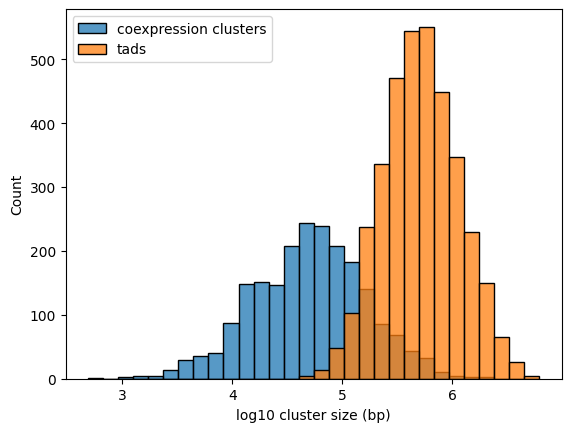

In [120]:
_, bins = np.histogram(np.concatenate([np.log10(clusters['end'] - clusters['start']), np.log10(tad_df['end'] - tad_df['start'])]), bins=30)
sns.histplot(np.log10(clusters['end'] - clusters['start']), label='coexpression clusters', bins=bins)
sns.histplot(np.log10(tad_df['end'] - tad_df['start']), label='tads', bins=bins)

plt.xlabel('log10 cluster size (bp)')
plt.legend()

<Axes: xlabel='N_genes', ylabel='log_size'>

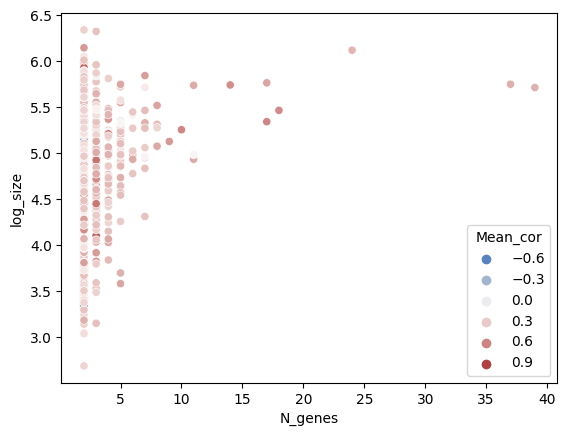

In [121]:
# are the larger clusters the ones with more genes?
clusters['log_size'] = np.log10(clusters['end'] - clusters['start'])
clusters['cluster_size'] = clusters['end'] - clusters['start']

sns.scatterplot(data=clusters, x='N_genes', y='log_size', hue='Mean_cor', palette='vlag')

In [122]:
# check how many tads each cluster overlaps
clusters['inter'] = pd.arrays.IntervalArray.from_arrays(clusters['start'], clusters['end'])
tad_df['inter'] = pd.arrays.IntervalArray.from_arrays(tad_df['start'], tad_df['end'])

def count_tad_overlap(row):
    tad_chr = tad_df[tad_df['Chromosome']==row.Chromosome]
    chr_tad_intervals = pd.arrays.IntervalArray.from_arrays(tad_chr['start'], tad_chr['end'])
    return sum(chr_tad_intervals.overlaps(row['inter']))

<Axes: xlabel='num_tads', ylabel='count'>

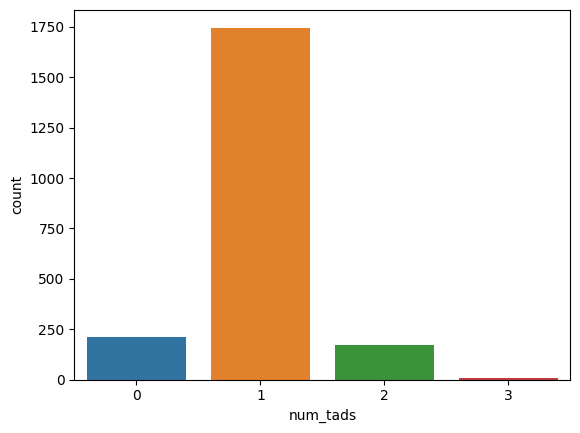

In [123]:
clusters['num_tads'] = clusters.apply(count_tad_overlap, axis=1)
sns.countplot(clusters, x='num_tads')

<Axes: xlabel='num_tads', ylabel='count'>

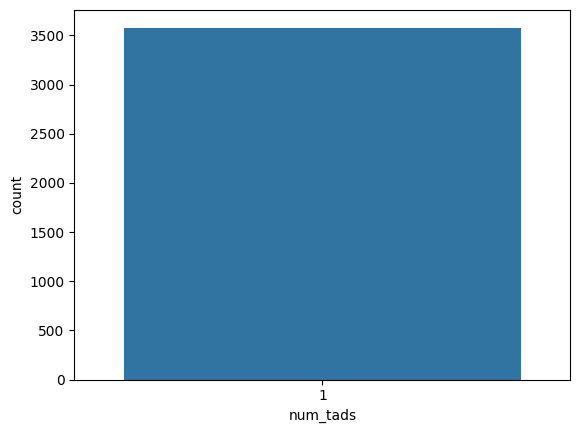

In [124]:
# check to see if TADs are non-overlapping 
tad_df['num_tads'] = tad_df.apply(count_tad_overlap, axis=1)
sns.countplot(tad_df, x='num_tads')

## Null with gene number

In [125]:
# get random stretches of genes that are the same number, then check if they are the same distance distribution (roughly)
transcript_df = transcript_df[transcript_df.Chromosome.isin(clusters.Chromosome.unique())]
# sort genes and add an increasing index
transcript_df.sort_values(['Chromosome', 'Start'], inplace=True)
transcript_df.reset_index(inplace=True)

In [126]:
def get_null_num_genes():
    # chose genes to be the start of the clusters
    transcript_df.sample(len(clusters))
    # then extend by the number of genes in the cluster
    null_inter=[]
    for n in clusters.N_genes:
        diff_chr=True
        while diff_chr:
            sead_idx = np.random.randint(len(transcript_df))
            null_genes = transcript_df.iloc[sead_idx:sead_idx+n]
            diff_chr = (null_genes.iloc[0].Chromosome != null_genes.iloc[-1].Chromosome)
        null_inter.append([n, null_genes.transcript_id.values, null_genes.Chromosome.iloc[0], null_genes.Start.min(), null_genes.End.max()])
        
    null_df = pd.DataFrame(null_inter, columns=['N_genes', 'Transcripts', 'Chromosome', 'start', 'end'])
    null_df['inter'] = pd.arrays.IntervalArray.from_arrays(null_df['start'], null_df['end'])
    null_df['num_tads'] = null_df.apply(count_tad_overlap, axis=1)
    return null_df


<Axes: xlabel='num_tads', ylabel='count'>

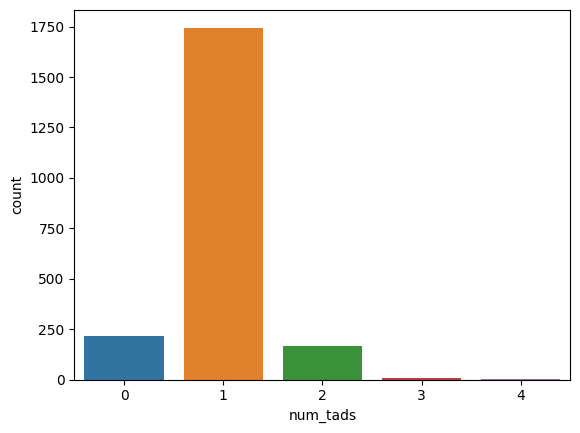

In [127]:
# check to see if null overlaps TADs
null_df = get_null_num_genes()
sns.countplot(null_df, x='num_tads')

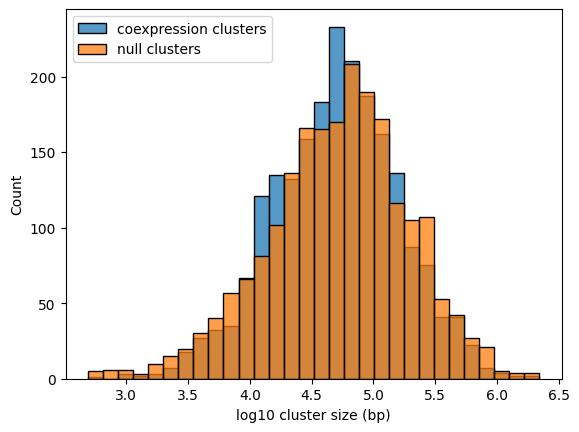

In [128]:
# check to see if inter-cluster distances are very different
_, bins = np.histogram(np.log10(clusters['end'] - clusters['start']), bins=30)
sns.histplot(np.log10(clusters['end'] - clusters['start']), label='coexpression clusters', bins=bins)
sns.histplot(np.log10(null_df['end'] - null_df['start']), label='null clusters', bins=bins)

plt.xlabel('log10 cluster size (bp)')
plt.legend()

In [129]:
# generate a whole null distribution 
count_list=[]
for i in tqdm(range(20)):
    null_df=get_null_num_genes()
    count_list.append(null_df['num_tads'].value_counts())

100%|██████████| 20/20 [01:27<00:00,  4.40s/it]


In [130]:
# reshape the null dataframe
null_counts_df = pd.DataFrame(count_list)
null_counts_df = null_counts_df.sort_index(axis=1)
null_counts_df.reset_index(drop=True, inplace=True)
null_melt = null_counts_df.melt(var_name='num_TADs')

# reshape the cluster counts add make one melted df
c_melt = pd.DataFrame(clusters['num_tads'].value_counts()).sort_index(axis=1).reset_index(names='num_TADs')
c_melt = c_melt.rename(columns={'num_tads':'value'})
full_melt = pd.concat([null_melt,c_melt] , keys=['null', 'clusters']).reset_index(level=0, names='data_type')

/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Counts of TADs overlapped for coexpression clusters')

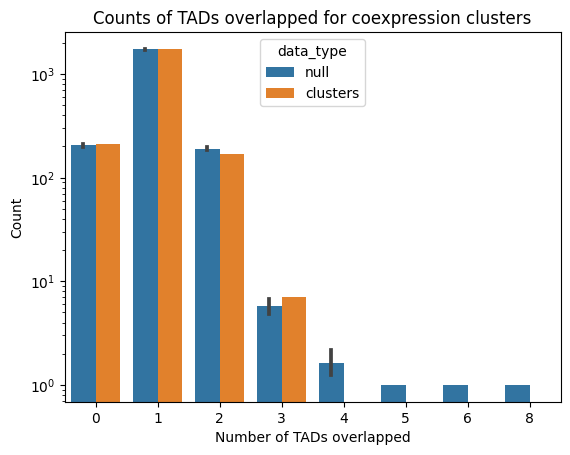

In [131]:
sns.barplot(full_melt, x='num_TADs', y='value', hue='data_type', log=True)
plt.ylabel('Count')
plt.xlabel('Number of TADs overlapped')
plt.title('Counts of TADs overlapped for coexpression clusters')

/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Counts of TADs overlapped for coexpression clusters')

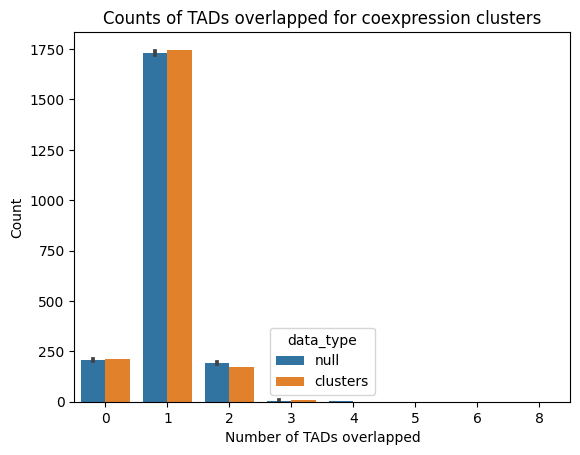

In [132]:
sns.barplot(full_melt, x='num_TADs', y='value', hue='data_type')
plt.ylabel('Count')
plt.xlabel('Number of TADs overlapped')
plt.title('Counts of TADs overlapped for coexpression clusters')

In [133]:
# load in the chr lengths
genome_path = '/home/klawren/oak/coexp_eqtl/data/hg38.bed'
genome_df = pd.read_csv(genome_path, header=None, names=['Chromosome', 'start','end'], sep=' ')
genome_df.set_index('Chromosome', inplace=True)
genome_df.head()

,start,end
Chromosome,,
chr1,0,248956422
chr2,0,242193529
chr3,0,198295559
chr4,0,190214555
chr5,0,181538259


In [134]:
def get_null_dist():
    null_inter=[]
    # go through each chromosome and get segments of length equal to the clusters there
    for chrom, sub_cluster in clusters.groupby('Chromosome'):
        idxs=[]
        for idx, row in sub_cluster.iterrows():
            idxs.append(np.random.randint(genome_df.loc[chrom]['end'] - row.cluster_size))

        null_inter.append(pd.DataFrame({'Chromosome':chrom, 'N_genes':len(sub_cluster), 'start':idxs, 'end':idxs + sub_cluster.cluster_size}))
    # make a df an annotate
    null_df = pd.concat(null_inter)
    null_df['inter'] = pd.arrays.IntervalArray.from_arrays(null_df['start'], null_df['end'])
    null_df['num_tads'] = null_df.apply(count_tad_overlap, axis=1)
    return null_df


In [135]:
# generate a whole null distribution 
count_list_dist=[]
for i in tqdm(range(20)):
    null_df=get_null_dist()
    count_list_dist.append(null_df['num_tads'].value_counts())
    
# reshape the null df
null_counts_df_dist = pd.DataFrame(count_list_dist)
null_counts_df_dist = null_counts_df_dist.sort_index(axis=1)
null_counts_df_dist.reset_index(drop=True, inplace=True)

100%|██████████| 20/20 [01:02<00:00,  3.14s/it]


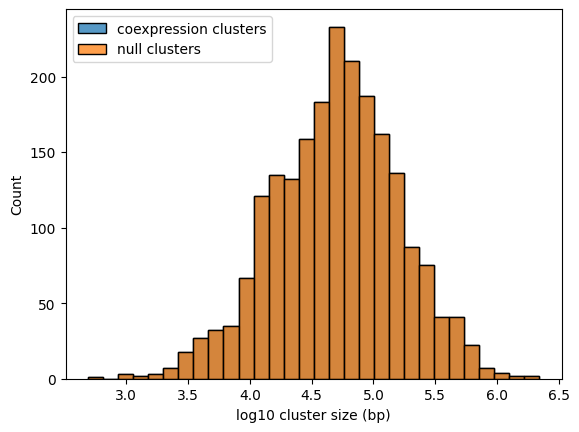

In [136]:
# check to see if inter-cluster distances are the same (as expected)
_, bins = np.histogram(np.log10(clusters['end'] - clusters['start']), bins=30)
sns.histplot(np.log10(clusters['cluster_size']), label='coexpression clusters', bins=bins)
sns.histplot(np.log10(null_df['end'] - null_df['start']), label='null clusters', bins=bins)

plt.xlabel('log10 cluster size (bp)')
plt.legend()

/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Counts of TADs overlapped for coexpression clusters')

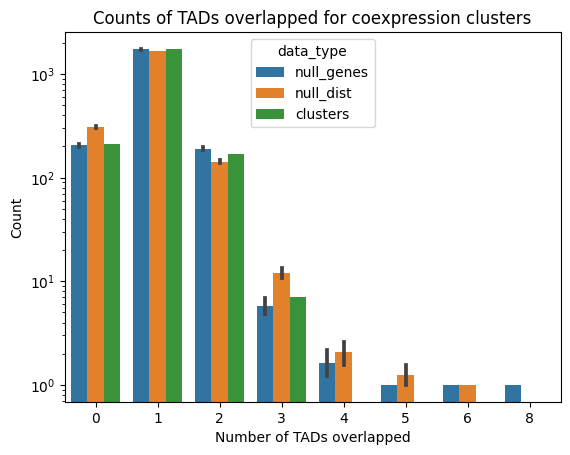

In [137]:
null_melt_dist = null_counts_df_dist.melt(var_name='num_TADs')
full_melt_dist = pd.concat([null_melt,null_melt_dist,c_melt] , keys=['null_genes', 'null_dist','clusters']).reset_index(level=0, names='data_type')

sns.barplot(full_melt_dist, x='num_TADs', y='value', hue='data_type', log=True)
plt.ylabel('Count')
plt.xlabel('Number of TADs overlapped')
plt.title('Counts of TADs overlapped for coexpression clusters')


/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/scg/apps/software/jupyter/python_3.9/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


Text(0.5, 1.0, 'Counts of TADs overlapped for coexpression clusters')

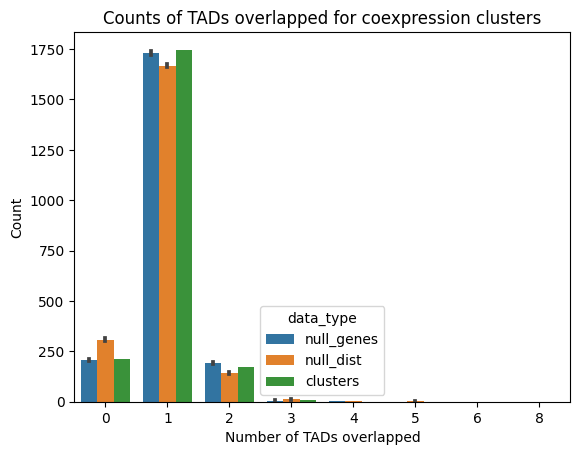

In [138]:
sns.barplot(full_melt_dist, x='num_TADs', y='value', hue='data_type', log=False)
plt.ylabel('Count')
plt.xlabel('Number of TADs overlapped')
plt.title('Counts of TADs overlapped for coexpression clusters')

In [ ]:
# load in other tissues to create a distribution for clusters too

# download the coexp clusters
clusters_path = '/home/klawren/oak/coexp_eqtl/output/Whole_Blood/clusters_all_chr.csv'
#clusters_path = '/home/klawren/oak/coexp_eqtl/output/Artery_Tibial/clusters_all_chr.csv'


# data from all chromosomes combined
clusters = pd.read_csv(clusters_path, index_col=0)
clusters['Chromosome']  = 'chr' + clusters['Chromosome'].astype(str)
clusters['start'] = clusters.apply(get_start, axis=1)
clusters['end'] = clusters.apply(get_end, axis=1)
clusters['log_size'] = np.log10(clusters['end'] - clusters['start'])
clusters['cluster_size'] = clusters['end'] - clusters['start']
clusters['inter'] = pd.arrays.IntervalArray.from_arrays(clusters['start'], clusters['end'])
clusters['num_tads'] = clusters.apply(count_tad_overlap, axis=1)

